In [25]:
import sys
import numpy as np
from predictors import LSM, GA, GD
import metrics
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
input_file = "data/2.txt"
f = open(input_file, "r");

In [3]:
def norm(X, c = 100):
    return X / c

In [4]:
def read_data(n):
    X = []
    y = []
    for i in range(n):
        v = list(map(int, f.readline().split()))
        X.append(v[:-1])
        y.append(v[-1])
    return np.array(X), np.array(y)

In [5]:
n_features = int(f.readline())

n_train = int(f.readline())
X_train, y_train = read_data(n_train)

n_test = int(f.readline())
X_test, y_test = read_data(n_test)

X_train, y_train, X_test, y_test = [norm(v) for v in [X_train, y_train, X_test, y_test]]

In [18]:
lsm_results = []
for t in [2**i for i in range(-12, 4)]:
    lsm = LSM(t)
    lsm.fit(X_train, y_train)
    lsm_results.append((metrics.smape(y_test, lsm.predict(X_test)), t))
lsm_results = sorted(lsm_results)
print("Best t:", lsm_results[0][1], "\nBest result:", lsm_results[0][0])

Best t: 0.015625 
Best result: 4.153979126819692e-05


In [13]:
ga = GA(n_features, size=200, epochs=10)
ga.fit(X_train, y_train)

print(metrics.smape(y_test, ga.predict(X_test)))

0.6246571292303629


In [39]:
gd_results = []
ts = [(2**i, i) for i in range(-15, -5)]
for t in ts:
    #print("Try t =",t)
    gd = GD(t[0])
    gd.fit(X_train, y_train)
    gd_results.append((metrics.smape(y_test, gd.predict(X_test)), "2**" + str(t[1])))
gd_results = sorted(gd_results)
print("Best t:", gd_results[0][1], "\nBest result:", gd_results[0][0])

Best t: 2**-14 
Best result: 0.0175068132495505


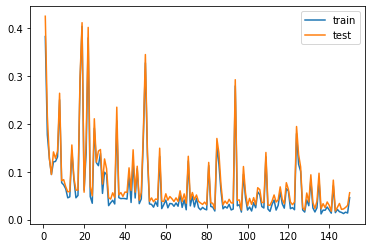

In [40]:
t = 2**(-14)
gd = GD(t)
gd.fit(X_train, y_train, X_test, y_test)
plt.plot([i + 1 for i in range(gd.epoch)], gd.smape_train, label="train")
plt.plot([i + 1 for i in range(gd.epoch)], gd.smape_test, label="test")
plt.legend()
plt.show()